In [1]:
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

## 原图

In [2]:
img=Image.open('../images/lena.png')

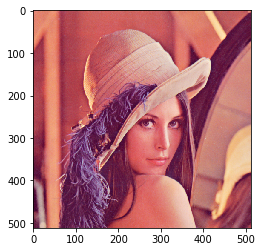

In [3]:
plt.imshow(img)
plt.show()

## 训练时aug方案

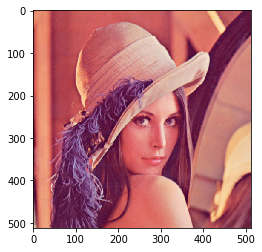

In [4]:
new_img = transforms.Compose([
    transforms.RandomOrder([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomResizedCrop(512, scale=(0.7, 1.0), ratio=(1,1), interpolation=2),
        transforms.RandomChoice([
            transforms.RandomRotation((0,0)),
            transforms.RandomRotation((90,90)),
            transforms.RandomRotation((180,180)),
            transforms.RandomRotation((270,270)),
            ])
        ]),
    ])(img)

plt.imshow(new_img)
plt.show()

## five crop 理解

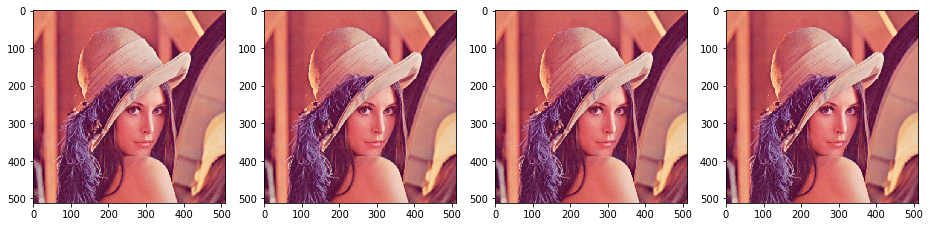

In [5]:
new_imgs = transforms.Compose([
    transforms.FiveCrop(512)
    ])(img)

plt.figure(num=3, figsize=(20,5))
plt.subplot(1,5,1),plt.imshow(new_imgs[0])
plt.subplot(1,5,2),plt.imshow(new_imgs[1])
plt.subplot(1,5,3),plt.imshow(new_imgs[2])
plt.subplot(1,5,4),plt.imshow(new_imgs[3])
plt.show()

## 测试时aug方案

torch.Size([4, 3, 512, 512])


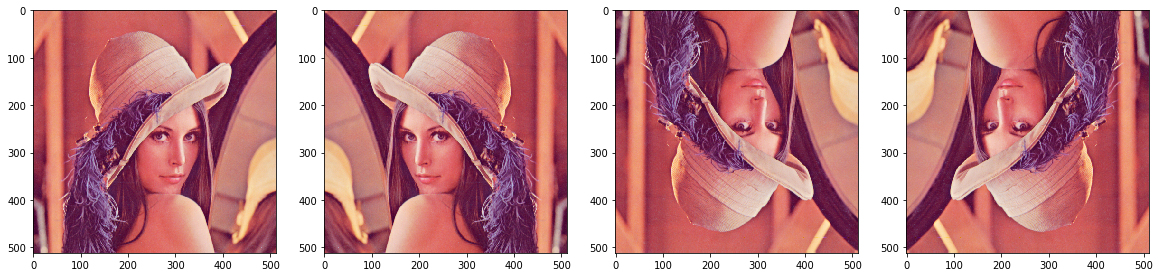

In [6]:
new_imgs = []
for i in range(4):
    new_img = transforms.Compose([
        transforms.RandomHorizontalFlip(p=i%2),
        transforms.RandomVerticalFlip(p=i//2),
    ])(img)
    new_imgs.append(new_img)

# for tensor
output_tensor = torch.stack([transforms.ToTensor()(img) for img in new_imgs])
print(output_tensor.shape)

# see what in tensor
plt.figure(num=3, figsize=(20,5))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(transforms.ToPILImage()(output_tensor[i]))
plt.show()